# An introduction to SymPy

This introductory document is an introduction to **SymPy**, a Python module which provides symbolic manipulation of mathematical object. 

To be honest, this document born as a support of my [homework][] to pass the exam :P therefore we will talk about  *generating functions* in algorithms analysis, mainly. This notebook isn't verbose from the theoretical point of view but it contains the necessary code to verify theoretical results seen during classes.

In particular we would like to give a tour of SymPy features and how we can apply them to solve some problems about facts studied in **PAA** course, thought by professors Donatella and Cecilia. They main goal of this document is to have an *hands on* approach: we will see how notebooks can be created and how put stuff in them toward experimenting with SymPy.

To give some references, we provide the [comprehensive][sympy-doc] documentation, which contains an updated and very doable [tutorial][sympy-tutorial]. As we will soon see, we can put textual content in this kind of document using [Markdown][markdown] syntax. For those new to Python and for further references see the official Python [tutorial][python-tutorial]. Alex Martelli, now at Google, has been and continue to be a [*very*][alex] active contributor, moreover next __april__ [PyCon] will be here in Florence, and Alex [will attend][alex-florence-pycon] ;)

The following are some interesting tutorials for additional readings:

  - http://byumcl.bitbucket.org/bootcamp2013/labs/sympy.html
  - https://github.com/Foundations-of-Applied-Mathematics/Labs
  - http://quant-econ.net/py/index.html
  - http://www.scipy-lectures.org/
  - https://github.com/sympy/sympy/wiki
  - [The Hitchhiker’s Guide to Python!][Hitchhiker]
  - [Sphinx][sphinx]

Have fun ;)

[sympy-doc]:http://docs.sympy.org/dev/index.html
[sympy-tutorial]:http://docs.sympy.org/dev/tutorial/index.html
[markdown]:https://daringfireball.net/projects/markdown/
[homework]:https://github.com/massimo-nocentini/pacc
[python-tutorial]:https://docs.python.org/3/tutorial/index.html
[main-doc]: https://github.com/massimo-nocentini/pacc/blob/master/compiled-versions/Elaborato.pdf
[alex]:http://www.aleax.it/python_mat_en.html
[PyCon]:https://www.pycon.it/en/
[alex-florence-pycon]:https://www.pycon.it/conference/p/alex-martelli
[Hitchhiker]:http://docs.python-guide.org/en/latest/
[sphinx]:http://sphinx-doc.org/contents.html

## Why SymPy?

Quoted from [here][why SymPy]:

>There are many computer algebra systems out there. This Wikipedia article lists many of them. What makes SymPy a better choice than the alternatives?

>First off, SymPy is completely free. It is open source, and licensed under the liberal BSD license, so you can modify the source code and even sell it if you want to. This contrasts with popular commercial systems like Maple or Mathematica that cost hundreds of dollars in licenses.

>Second, SymPy uses Python. Most computer algebra systems invent their own language. Not SymPy. SymPy is written entirely in Python, and is executed entirely in Python. This means that if you already know Python, it is much easier to get started with SymPy, because you already know the syntax (and if you don’t know Python, it is really easy to learn). We already know that Python is a well-designed, battle-tested language. The SymPy developers are confident in their abilities in writing mathematical software, but programming language design is a completely different thing. By reusing an existing language, we are able to focus on those things that matter: the mathematics.

>Another computer algebra system, Sage also uses Python as its language. But Sage is large, with a download of over a gigabyte. An advantage of SymPy is that it is lightweight. In addition to being relatively small, it has no dependencies other than Python, so it can be used almost anywhere easily. Furthermore, the goals of Sage and the goals of SymPy are different. Sage aims to be a full featured system for mathematics, and aims to do so by compiling all the major open source mathematical systems together into one. When you call some function in Sage, such as integrate, it calls out to one of the open source packages that it includes. In fact, SymPy is included in Sage. SymPy on the other hand aims to be an independent system, with all the features implemented in SymPy itself.

>A final important feature of SymPy is that it can be used as a library. Many computer algebra systems focus on being usable in interactive environments, but if you wish to automate or extend them, it is difficult to do. With SymPy, you can just as easily use it in an interactive Python environment or import it in your own Python application. SymPy also provides APIs to make it easy to extend it with your own custom functions.

[why SymPy]:http://docs.sympy.org/dev/tutorial/intro.html#why-sympy

---
As first step we load all necessary SymPy stuff:

In [1]:
import sympy
from sympy import *
from sympy.abc import x, n, z, t, k

init_printing() # for nice printing, a-la' TeX

## Object and Meta language, expression tree and gotchas

First of all, let us introduce a concept to keep in mind, always. In what follows it is important to distinguish the *meta language*, which is the set of SymPy objects that denotes mathematical objects, which are the *object language*:

In [6]:
a = Symbol('a')
a

$a$ is the mathematical object, `a` is the meta object that denotes $a$ ;)

---
Under the hood, *every* SymPy expression is internally represented as a [tree][expr-tree]. In particular, the following is an *invariant* property:
>_Every well-formed SymPy expression must either have empty args or satisfy expr == expr.func(*expr.args)_.

---
Finally, always keep in mind some [pitfalls].

[expr-tree]:http://docs.sympy.org/dev/tutorial/manipulation.html#advanced-expression-manipulation
[pitfalls]:http://docs.sympy.org/dev/gotchas.html

## Quicksort: average number of swap

In this section we report a simple manipulation of a formula in order to study the average number of swaps during a Quicksort execution. In the main document we obtain that $S(n)$, the function that count the average number of swaps done on a given input vector of size $n$, satisfies the following recurrence:
$$ nS(n) - (n-1)S(n-1) =  \frac{2n-3}{6} + 2\,S(n-1)$$
with little manipulation and unfolding $S(n-1)$, with $S(0) = S(1) = S(2) = 0$ as base cases, it is the same as: 
$$
\frac{S(n)}{n+1} =  \frac{S(n-1)}{n} +  \frac{2n -3}{6n(n+1)} 
$$
solving the recurrence yields:
$$\frac{S(n)}{n+1}= \sum_{k=3}^{n}{ \frac{2k-3}{6k(k+1)} }$$

As a first step we define the abstraction bound on the rightmost summation over $k$:

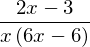

In [2]:
def f(k): return (2*k-3)/(6*(k-1)*k)
f(x)

In order to get a bound for $S(n)$, decompose it in partial fractions:

Help on function apart in module sympy.polys.partfrac:

apart(f, x=None, full=False, **options)
    Compute partial fraction decomposition of a rational function.
    
    Given a rational function ``f``, computes the partial fraction
    decomposition of ``f``. Two algorithms are available: One is based on the
    undertermined coefficients method, the other is Bronstein's full partial
    fraction decomposition algorithm.
    
    The undetermined coefficients method (selected by ``full=False``) uses
    polynomial factorization (and therefore accepts the same options as
    factor) for the denominator. Per default it works over the rational
    numbers, therefore decomposition of denominators with non-rational roots
    (e.g. irrational, complex roots) is not supported by default (see options
    of factor).
    
    Bronstein's algorithm can be selected by using ``full=True`` and allows a
    decomposition of denominators with non-rational roots. A human-readable
    result can be 

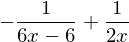

In [6]:
partfrac = f(x).apart(); help(apart); partfrac

Since summation is the 'discrete equivalent' of integration, do it:

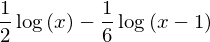

In [7]:
partfrac.integrate(x)

So the result above proves that $S(n) \in \mathcal{O}(n logn)$ as required. It is interesting to see if SymPy is able or not to solve the given recurrence for the number of swaps:

Help on function rsolve in module sympy.solvers.recurr:

rsolve(f, y, init=None)
    Solve univariate recurrence with rational coefficients.
    
    Given `k`-th order linear recurrence `\operatorname{L} y = f`,
    or equivalently:
    
    .. math:: a_{k}(n) y(n+k) + a_{k-1}(n) y(n+k-1) +
              \dots + a_{0}(n) y(n) = f(n)
    
    where `a_{i}(n)`, for `i=0, \dots, k`, are polynomials or rational
    functions in `n`, and `f` is a hypergeometric function or a sum
    of a fixed number of pairwise dissimilar hypergeometric terms in
    `n`, finds all solutions or returns ``None``, if none were found.
    
    Initial conditions can be given as a dictionary in two forms:
    
        (1) ``{   n_0  : v_0,   n_1  : v_1, ...,   n_m  : v_m }``
        (2) ``{ y(n_0) : v_0, y(n_1) : v_1, ..., y(n_m) : v_m }``
    
    or as a list ``L`` of values:
    
        ``L = [ v_0, v_1, ..., v_m ]``
    
    where ``L[i] = v_i``, for `i=0, \dots, m`, maps to `y(n_i)`.
    
    Examples
  

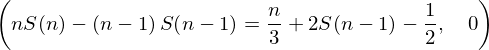

In [8]:
>>> from sympy import Function, rsolve
>>> from sympy.abc import n
>>> S = Function('S')
#>>> f = (n - 1)*y(n + 2) - (n**2 + 3*n - 2)*y(n + 1) + 2*n*(n + 1)*y(n)
>>> f = Eq(n*S(n) - (n-1)*S(n-1),   (2*n-3)/6 +  2*S(n-1))
>>> help(rsolve)
# using initial conditions seems to not work. On the other hand, not giving them, it remain pending
>>> f, rsolve(f, S(n), {S(0):0, S(1):0})


as we see in the second component, SymPy isn't able to solve the recurrence. For the curious, maxima can solve that ;) have a check within Sage...

    > maxima('load("solve_rec")')
    > quicksort_recurrence = maxima('n*s[n] - (n-1)*s[n-1] = (2*n-3)/6 + 2*s[n-1]')
    > quicksort_recurrence.solve_rec_rat('s[n]')
    > latex(_) # _ denotes last computed value

[here][sage-maxima] there's a detailed description of Sage interface to Maxima, including some examples.

[sage-maxima]:http://doc.sagemath.org/html/en/reference/interfaces/sage/interfaces/maxima.html

## Pretty printing values

Here we see some nice pretty printing facilities, we start with two dummy examples:

In [9]:
from IPython.display import Math
Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

<IPython.core.display.Math object>

In [52]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{eqnarray}""")

<IPython.core.display.Latex object>

The following are the solution $S_{n}$ of quicksort swaps recurrence, given by _maxima_ using the function <code>solve_rec</code>:

In [20]:
Latex(r'$$s_{n}=\left(\sum_{{\it j}=0}^{n-1}{{{{{2\,{\it j}}\over{6\,  {\it j}+6}}-{{1}\over{6\,{\it j}+6}}}\over{{\it j}+2}}}\right)  \,\left(n+1\right)+{\it k}_{1}\,\left(n+1\right)$$')

<IPython.core.display.Latex object>

on the other hand this is the solution given using function <code>solve_rec_rat</code>:

In [11]:
Latex(r'$$s_{n}={{{\it k}_{2}\,n+{\it k}_{1}}\over{6}}$$')

<IPython.core.display.Latex object>

I am sorry to not show the clean solution, I've to understand how to provide boundary values $S_{0}=0$ and $S_{1}=0$. However, it is possible to go the way back, namely have the *Latex* representation of _every_ SymPy object:

In [19]:
latex(partfrac.integrate(x))

'\\frac{1}{2} \\log{\\left (x \\right )} - \\frac{1}{6} \\log{\\left (x - 1 \\right )}'

many other representations can be asked for, have a look [here][tutorial-printing].

[tutorial-printing]:http://docs.sympy.org/dev/tutorial/printing.html#printing-functions

## Unevaluated and evaluated sums and some rewritings

In this section we would like to introduce objects whose denote sums. 

To have a context, consider again a step in the proof for the solution of the quicksort swaps recurrence seen at the beginning. Given a permutation $\mathbf{\omega}$ of length $n$ to be consumed by quicksort, let $K_{j}$ be a *random variable* that counts the number of swaps $s$ required to sort $\mathbf{\omega}$, defined as:
$$
    K_{j} = s \leftrightarrow \mathbf{\omega}_{n} = j
$$
in class we've seen that the mean of $K_{j}$ satisfies:
$$
    \mathbb{E}\,K_{j} = \frac{\left(j - 1\right) {\binom{n - 2}{j - 1}}}{{\binom{n - 1}{j - 1}}}
$$
which can be rewritten as:
$$
    \mathbb{E}\,K_{j} = \frac{(j-1)(n-j)}{n-1}
$$
Finally, use such this result to have a chunk of the recurrence:
$$
    \frac{1}{n}\left(\sum_{j=1}^{n}{\mathbb{E}\,K_{j}}\right) = \frac{n-2}{6}
$$
since *mean* operator $\mathbb{E}$ is a linear respect sum...let's do a check ;)

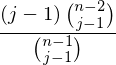

In [41]:
n,j = symbols('n j')

expr = (j-1)*binomial(n-2,j-1)/binomial(n-1,j-1)
expr

SymPy allows us to *rewrite* an expression using a given function, if it's possible. Here we would like to rewrite binomial coefficients with factorial terms:

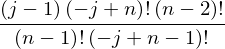

In [40]:
 expr.rewrite(factorial)

finally, we do some simplifications:

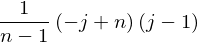

In [42]:
expr.simplify()

Now we introduce an object to denote the sum we're interested in. We start by denoting such a sum as [*unevaluated*][uneval-sum], namely keep it pure, as in mathematics:

[uneval-sum]:http://docs.sympy.org/dev/modules/concrete.html?highlight=summation#sympy.concrete.summations.Sum

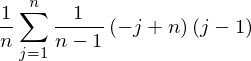

In [43]:
our_summation=(1/n)*Sum(expr.simplify(),(j,1,n))
our_summation

such unevaluated sum can be mapped to an [evaluated][eval-sum] one, [*doing*][doit] such summation:

[doit]:http://docs.sympy.org/dev/modules/core.html?highlight=doit#sympy.core.basic.Basic.doit
[eval-sum]:http://docs.sympy.org/dev/modules/concrete.html?highlight=summation#sympy.concrete.summations.summation

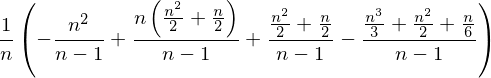

In [48]:
evaluated_sum = our_summation.doit()
evaluated_sum

finally, we can [factor] such summation to have our result, as required:

[factor]:http://docs.sympy.org/dev/modules/core.html?highlight=factor#sympy.core.expr.Expr.factor

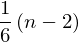

In [49]:
evaluated_sum.factor()

## On binomial coefficients

In the following cell we report a pair of sequences. We start with [*central binomial coefficients*][sequence]:

[sequence]:http://oeis.org/A000984

In [50]:
def central_binomial_coefficient(k): return binomial(Rational(2*k,1), k)

limit = 10
[central_binomial_coefficient(k) for k in range(limit)]

the second one holds [*Catalan numbers*][catalan-oeis], which are provided by SymPy [also][catalan]:

[catalan]:http://docs.sympy.org/dev/modules/functions/combinatorial.html?highlight=catalan#sympy.functions.combinatorial.numbers.catalan
[catalan-oeis]:http://oeis.org/A000108

In [52]:
def catalan_number(k): return Rational(1,k+1)*central_binomial_coefficient(k)

[catalan_number(k) for k in range(limit)]

In this section we use the method explained in the theoretical document in order to evaluate particular binomial coefficients. We start with defining the ''kernel'' function to be expanded:

In [60]:
def f(r, z): return (1 + z)**r

In order to compute $ { \frac{1}{2} \choose {3} }$ we do Taylor expansion using the dummy variable $z$:

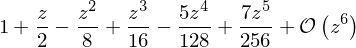

In [10]:
series(f(Rational(1,2), z))

finally take the coefficient of $z^3$, so $ { \frac{1}{2} \choose {3} } = \frac{1}{16}$

Another try: we want to compute $ { -\frac{1}{2} \choose {k} }$, for a generic $k$. It is possible to use the method as before:

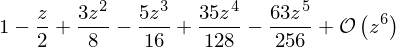

In [11]:
series(f(Rational(-1,2), z))

Otherwise we can use the manipulation (see the theoretical doc for details):
$$  {{- \frac{1}{2} }\choose{k}} = \frac{(-1)^k}{4^k} {{2k}\choose{k}}  $$
defining an helper function and building a list via comprehension:

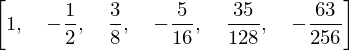

In [12]:
def helper(k): return ((-1)**k / 4**k)*binomial(2*k, k)
[helper(Rational(k,1)) for k in range(6)]

Coefficients in the previous list comprehension are the same as in Taylor expansion, as required.

The following cell shows coefficient of ${ { -\frac{3}{2} } \choose {k}} $ for heading values of $k$, a rewriting to prove is the following:
$$
{ { -\frac{3}{2} } \choose {k}} = \frac{(-1)^k  (2k + 1)}{4^k}  { { 2k } \choose {k}}
$$
using series expansion:

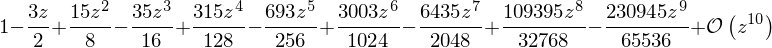

In [31]:
series(f(Rational(-3,2), z), z, n=10)

while mapping the rewriting:

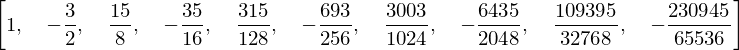

In [53]:
def minus_three_over_two_choose_k(k): return ((-1)**k *(2*k+1))*binomial(2*k, k)/4**k
[minus_three_over_two_choose_k(Rational(k,1)) for k in range(10)]

SymPy provides different ways to denote a Taylor expansion of a function. We have used function [`series`][series] but there are other versions, such as [`lseries`][lseries], which returns an [iterator] over series terms:

[series]:http://docs.sympy.org/dev/modules/core.html?highlight=series#sympy.core.expr.Expr.series
[lseries]:http://docs.sympy.org/dev/modules/core.html?highlight=series#sympy.core.expr.Expr.lseries
[iterator]:https://docs.python.org/3.5/library/itertools.html

In [73]:
our_gen = f(Rational(-3,2),z).lseries(z)
our_gen

<generator object Expr.series.<locals>.<genexpr> at 0x7f6275e7e830>

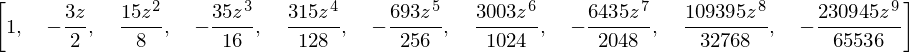

In [74]:
[next(our_gen) for _ in range(10)]

remember to restart the generator re-evaluating the previous cell ;)

### Fibonacci numbers revisited: numerical and matrix approach, functional programming and memoization

In this section we would like to explore Fibonacci numbers using several point of view: a fast numerical implementation, a functional programming approach and, finally, a standard one provided by SymPy. We'll go under the hood, looking at the source code of the distribution to gain insights about SymPy internals.

The following code uses NumPy to perform computations:

In [88]:
import numpy as np
from numpy.linalg import eig

F_matrix = np.array([[0,1],[1,1]])
    
def fibo(n):
    
    F_init = np.array([1,1]).T
    
    for i in range(n):
        F_init = F_matrix @ F_init
        
    return F_init

[fibo(i) for i in range(300)]

[array([1, 1]),
 array([1, 2]),
 array([2, 3]),
 array([3, 5]),
 array([5, 8]),
 array([ 8, 13]),
 array([13, 21]),
 array([21, 34]),
 array([34, 55]),
 array([55, 89]),
 array([ 89, 144]),
 array([144, 233]),
 array([233, 377]),
 array([377, 610]),
 array([610, 987]),
 array([ 987, 1597]),
 array([1597, 2584]),
 array([2584, 4181]),
 array([4181, 6765]),
 array([ 6765, 10946]),
 array([10946, 17711]),
 array([17711, 28657]),
 array([28657, 46368]),
 array([46368, 75025]),
 array([ 75025, 121393]),
 array([121393, 196418]),
 array([196418, 317811]),
 array([317811, 514229]),
 array([514229, 832040]),
 array([ 832040, 1346269]),
 array([1346269, 2178309]),
 array([2178309, 3524578]),
 array([3524578, 5702887]),
 array([5702887, 9227465]),
 array([ 9227465, 14930352]),
 array([14930352, 24157817]),
 array([24157817, 39088169]),
 array([39088169, 63245986]),
 array([ 63245986, 102334155]),
 array([102334155, 165580141]),
 array([165580141, 267914296]),
 array([267914296, 433494437]),
 arr

Previous computation overflows: fast but bad :(

On the other hand, in the following code we'll use symbolic SymPy computations. We start by coding the matrix seen above using a SymPy object that belong to Matrix class. It is very interesting to see the eigen-values of that matrix...they recall something, don't they?

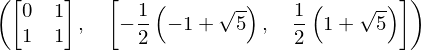

In [72]:
F_matrix = Matrix([[0,1],[1,1]])
F_matrix, list(map(factor, F_matrix.eigenvals()))

we can code the computation as a *folding* (Python calls it [`reduce`][reduce]) operation, providing the initial value:

[reduce]:https://docs.python.org/3.5/library/functools.html#functools.reduce

In [74]:
from functools import reduce 

def fibo(n):
        
    F_init = Matrix([[1,1]]).T
    
    return reduce(lambda v,e: F_matrix * v, range(n), F_init)
    
    # Previous `reduce' application means the following:
    
    #for i in range(n):
    #    F_init = F_matrix * F_init   
    #return F_init

here we provide a memoized implementation, coded by hand, to show how the [decorator] *recurrence_memo* can be used. Such decorator is supplied by SymPy, however Python standard library provides its own [functools.lru_cache][lru_cache].

[decorator]:https://www.python.org/dev/peps/pep-0318/
[lru_cache]:https://docs.python.org/3/library/functools.html#functools.lru_cache

In [89]:
from sympy.utilities.memoization import *

@recurrence_memo([1,1])
def memoized_fibonacci(n,prev): return prev[-1] + prev[-2]

In [103]:
def time_them(elements=600):

    # it uses memoization implemented by hand a little above
    %time [memoized_fibonacci(i) for i in range(elements)]

    # it uses SymPy implementation, coded in sympy/mpmath/libmp/libintmath.py, 
    # referenced by sympy/functions/combinatorial/numbers.py (here it is interesting
    # to look at how a function can be defined to belong to SymPy hierarchy)
    %time [fibonacci(i) for i in range(elements)]

    # it uses matrix implementation, without memoization
    %time [fibo(i) for i in range(elements)]

for i, e in enumerate(range(100,801,50)):
    print("iteration {0} asking for {1} Fibonacci numbers\n".format(i,e))
    time_them(elements=700)
    print(("-" * 75) + "\n")
    
print("#" * 75)
print("repeating an already computed call should be smart for the former two implementations...\n")
for elem in [150, 300, 600, 800]:
    print("iteration asking for {0} *already seen* Fibonacci numbers\n".format(e))
    time_them(elem)
    print(("-" * 75) + "\n")
    
None

# the following mapping allows us to extract a sequence of numbers 
# instead of a list of vectors
# %time list(map(lambda v: v[0], [fibo(i) for i in range(elements)]))

iteration 0 asking for 100 Fibonacci numbers

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 266 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 578 µs
CPU times: user 628 ms, sys: 0 ns, total: 628 ms
Wall time: 624 ms
---------------------------------------------------------------------------

iteration 1 asking for 150 Fibonacci numbers

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 493 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.19 ms
CPU times: user 668 ms, sys: 0 ns, total: 668 ms
Wall time: 669 ms
---------------------------------------------------------------------------

iteration 2 asking for 200 Fibonacci numbers

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 553 µs
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.33 ms
CPU times: user 728 ms, sys: 0 ns, total: 728 ms
Wall time: 726 ms
---------------------------------------------------------------------------

iteration 3 asking for 250 Fibonacci numbers

CPU 

# Generating Functions

In this short section we play with *convolution* of generating functions. The following use the "operator" $1-t$ to build a sequence where terms are differences of consecutive coefficients belonging to a given sequence:

In [122]:
a = Function('a')(t)
b = Function('b')(t)
use_me = Eq(a, b * (1-t))
use_me,use_me.subs(b, 1 + 1*t + 2*t**2 + 10*t**4 + 9*t**5).rhs.series(t).simplify()

Next we use the operator $\frac{1}{1-t}$ to build a sequence where terms are cumulates of coefficients seen so far:

In [34]:
a = Function('a')(t)
b = Function('b')(t)
use_me = Eq(a, b * (1-t)**-1)
use_me.subs(b, 1 + 1*t + 2*t**2 + 10*t**4 + 9*t**5).rhs.series(t).simplify()

Many other operators can be found in [Riordan] and [Knuth] books ;)

[Riordan]:http://onesearch.unifi.it/primo_library/libweb/action/search.do?cs=frb&ct=frb&frbg=12248995&fctN=facet_frbrgroupid&fctV=12248995&doc=dedupmrg12749232&lastPag=&lastPagIndx=1&rfnGrp=frbr&frbrSrt=date&frbrRecordsSource=Primo+Local&dscnt=0&frbg=&scp.scps=scope%3A(39UFI)%2C39UFI_EbscoLocal%2Cprimo_central_multiple_fe&tab=default_tab&dstmp=1447757673335&srt=rank&ct=search&mode=Basic&&dum=true&tb=t&indx=1&vl(freeText0)=john%20riordan%20introduction%20to%20combinatorial%20analysis&vid=39UFI_V1&fn=search

[Knuth]:http://onesearch.unifi.it/primo_library/libweb/action/search.do?cs=frb&ct=frb&frbg=13427606&fctN=facet_frbrgroupid&fctV=13427606&doc=dedupmrg12583599&lastPag=&lastPagIndx=1&rfnGrp=frbr&frbrSrt=date&frbrRecordsSource=Primo+Local&dscnt=0&frbg=&scp.scps=scope%3A(39UFI)%2C39UFI_EbscoLocal%2Cprimo_central_multiple_fe&tab=default_tab&dstmp=1447757940159&srt=rank&ct=search&mode=Basic&&dum=true&tb=t&indx=1&vl(freeText0)=knuth%20graham%20concrete%20mathematics&vid=39UFI_V1&fn=search

---

# *SymPy* sandbox

In [36]:
pi.evalf(100)

In [37]:
a = symbols('a0:10')
a

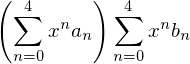

In [15]:
x = numbered_symbols('x')
next(x), next(x)
x = Symbol('x')
ai = IndexedBase('a')
bi = IndexedBase('b')
a = Sum(ai[n]*x**n, (n, 0, 4))
b = Sum(bi[n]*x**n, (n, 0, 4))
expand(a*b)


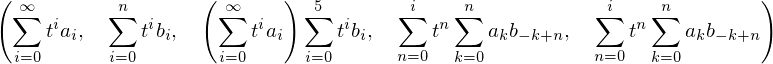

In [39]:
k, k0, k1, k2, t, i = symbols('k k:3 t i')
k_gen = numbered_symbols('a')
a_k = IndexedBase('a')
b_n_k = IndexedBase('b')
i_tuple = (i, 0, n)
a_sum = summation(a_k[i]*t**i, (i,0,oo) )
b_sum = Sum(b_n_k[i]*t**i, i_tuple)
limit = 5
a_b_prod = a_sum.subs(n,limit) * b_sum.subs(n,limit)
G_conv = Sum(Sum(a_k[k] * b_n_k[n-k], (k, 0, n))*t**n, (n, 0, i))
a_sum.subs(n,5).doit(), b_sum, expand(a_b_prod,mul=True), G_conv, G_conv

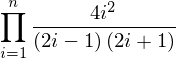

In [40]:
W2 = Product(2*i/(2*i-1)*2*i/(2*i+1), (i, 1, n))
W2 # it should print: Product(4*i**2/((2*i - 1)*(2*i + 1)), (i, 1, n))

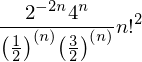

In [41]:
W2e = W2.doit()
W2e # it should return: 2**(-2*n)*4**n*(factorial(n))**2/(RisingFactorial(1/2, n)*RisingFactorial(3/2, n))

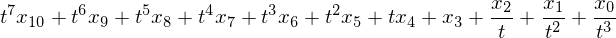

In [42]:
x = numbered_symbols('x')
k = numbered_symbols('k')
xi = IndexedBase('x')
expand((next(x) + next(x) + next(x))*(next(k) + next(k) + next(k)))
my_sum = (Sum(xi[i]*t**i, (i,0, n))).subs(n,5).doit().subs(xi[5],4)
(my_sum * my_sum)
simplify(Sum(xi[i]*t**i, (i,0, n)).subs(n,10).doit()/t**3)

In [43]:
a = IndexedBase('a')
s = Sum(xi[i]*t**i, (i,0, n))
f = Lambda(t, t+1)
f

In [60]:
series(t/(1-t)**2, n=10)

$d_{nk}$ is the number of *Collatz chains* of length $n$ with $k$ inversions

# $A=B$

In [7]:
def an_example(n): return factorial(n+1)/factorial(n)

an_example(n).simplify()

Help on method rewrite in module sympy.core.basic:

rewrite(*args, **hints) method of sympy.core.mul.Mul instance
    Rewrite functions in terms of other functions.
    
    Rewrites expression containing applications of functions
    of one kind in terms of functions of different kind. For
    example you can rewrite trigonometric functions as complex
    exponentials or combinatorial functions as gamma function.
    
    As a pattern this function accepts a list of functions to
    to rewrite (instances of DefinedFunction class). As rule
    you can use string or a destination function instance (in
    this case rewrite() will use the str() function).
    
    There is also the possibility to pass hints on how to rewrite
    the given expressions. For now there is only one such hint
    defined called 'deep'. When 'deep' is set to False it will
    forbid functions to rewrite their contents.
    
    Examples
    
    >>> from sympy import sin, exp
    >>> from sympy.abc import x
   

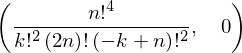

In [27]:
def rhs(n): return binomial(2*n,n)
def t(n,k): return binomial(n,k)**2
def F(n,k): return t(n,k)/rhs(n)
def R(n,k): return -((3*n + 3-2*k)*k**2)/(2*(2*n+1)*(n+1-k)**2)
def G(n,k): return R(n,k)*F(n,k)
k= Symbol('k')
f=F(n,k)
help(f.rewrite)
f.rewrite(factorial), (F(n+1,k)-F(n,k)-G(n,k+1)+G(n,k)).simplify()

## Exercises

The following is exercise 1 of section 2.7

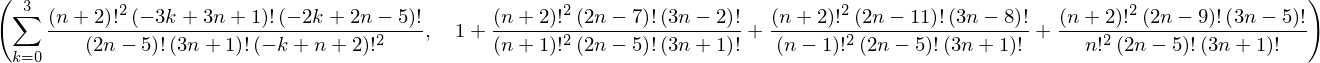

In [7]:
def f(n): return (factorial(3*n+1)*factorial(2*n-5))/((factorial(n+2))**2)
n,k=symbols('n k')
_sum = Sum(f(n-k)/f(n), (k,0,3))
_sum, _sum.doit()

In [9]:
hyper([],[],t).simplify()

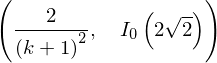

In [26]:
def term(k): return (2**k)/(factorial(k)**2)
(term(k+1)/term(k)).simplify(), Sum(term(k),(k,0,oo)).doit()

In [70]:
d = {}
d['hello']='world'
d['hello']='hello'
d, 'world' in d, 'hello' in d

({'hello': 'hello'}, False, True)

## Expanding a `Sum` object

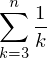

In [129]:
k, n = symbols('k n')
working_sum = Sum(1/k, (k, 3, n))
working_sum

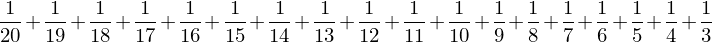

In [130]:
def expand_Sum(aSumExpr):
    
    generic_sum_coeff, (sum_index, starting_bound, ending_bound) = aSumExpr.args
    
    result = None
    
    if starting_bound.free_symbols:
        result = lambda **symbols: expand_Sum(aSumExpr.func(generic_sum_coeff, 
                                                (sum_index, starting_bound.subs(symbols), ending_bound)))
    elif ending_bound.free_symbols:
        result = lambda **symbols: expand_Sum(aSumExpr.func(generic_sum_coeff, 
                                                (sum_index, starting_bound, ending_bound.subs(symbols))))
    elif ending_bound.is_infinite: 
        
        result = aSumExpr
        
        '''
        def splitter(new_symbol):
            new_term_for_expansion = aSumExpr.func(generic_sum_coeff,
                                                    (sum_index, starting_bound, new_symbol))
            rest_of_infinite_term = aSumExpr.func(generic_sum_coeff,
                                                    (sum_index, new_symbol+1, ending_bound))
            expanded_new_term = expand_Sum(new_term_for_expansion)
            return Add(expanded_new_term, rest_of_infinite_term, evaluate=False)
        
        result = splitter
        '''
    else:    
        summands = [generic_sum_coeff.subs(sum_index, n) for n in range(starting_bound, ending_bound+1)]
        result = Add(*summands, evaluate=False)
        
    return result
            
expand_Sum(working_sum)(n=20)


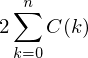

In [49]:
C_function = Function('C')
Sum(2*C_function(k), (k,0,n)).factor()


In [152]:
a = WildFunction('a')
i = Wild('i')

wf = (C_function(k)).match(i*a)
wf[a], wf[i]

## Unfolding a recurrence relation

In [5]:
import sys

sys.setrecursionlimit(2000)

In [62]:
# %load "recurrences.py"

from functools import reduce
from string import Template

def take_apart_matched(term, indexed):
    
    wild_coeff = Wild('coeff', exclude=[indexed])
    wild_term, wild_subscript = Wild('term'), Wild('subscript')

    matched_term = term.match(wild_coeff * wild_term)

    result = None

    if matched_term: 
        coeff, indexed_term = matched_term[wild_coeff], matched_term[wild_term]
        matched_term_subscript = indexed_term.match(indexed[wild_subscript])
        if matched_term_subscript:
            term_subscript = matched_term_subscript[wild_subscript]
            result = {'coeff':coeff, 'subscript':term_subscript}

    return result


def unfold_recurrence(recurrence_spec, unfolding_recurrence_spec=None):

    if not unfolding_recurrence_spec: unfolding_recurrence_spec = recurrence_spec

    def worker(recurrence_eq, unfolding_recurrence_eq, indexed, index, terms_cache):

        def unfolding(rhs_term):
            
            if rhs_term in terms_cache: return terms_cache[rhs_term]
            
            matched_rhs_term = take_apart_matched(rhs_term, indexed)
            unfolded_term = rhs_term
            
            if matched_rhs_term:
                
                matched_lhs_term = take_apart_matched(recurrence_eq.lhs, indexed)
            
                def match_linear(subscript, variable):
                    
                    a_wild, b_wild = Wild('a', exclude=[variable]), Wild('b', exclude=[variable])
                    matched = subscript.match(a_wild*variable + b_wild)
                    
                    if not matched: return None
                    
                    a, b = matched[a_wild], matched[b_wild]
                    normalizer = lambda term: term.replace(variable, variable - (b/a))
                   
                    return normalizer
                
                lhs_normalizer = match_linear(matched_lhs_term['subscript'], index)
                
                norm_lhs = lhs_normalizer(recurrence_eq.lhs)
                subs_lhs = norm_lhs.replace(index, matched_rhs_term['subscript'])
                matched_subs_lhs_term = take_apart_matched(subs_lhs, indexed)
                # since subscripts are equal by substitution, we have to check coefficients
                assert matched_subs_lhs_term['subscript'] == matched_rhs_term['subscript']
                if matched_subs_lhs_term['coeff'] == matched_rhs_term['coeff']:
                    rebuilt_rhs_term = lhs_normalizer(recurrence_eq.rhs)
                    unfolded_term = rebuilt_rhs_term.replace(index, matched_rhs_term['subscript'])
                    terms_cache[rhs_term] = unfolded_term
                
            return unfolded_term    
            
        unfolded_rhs_terms = map(unfolding, flatten(unfolding_recurrence_eq.rhs.args, cls=Add))
        
        folded_rhs_term = reduce(   lambda folded, addend: Add(folded, addend, evaluate=False), 
                                    unfolded_rhs_terms)
        
        return dict(recurrence_eq=Eq(recurrence_eq.lhs, folded_rhs_term),
                    indexed=indexed,
                    index=index,
                    terms_cache=terms_cache)

    return worker(  recurrence_spec['recurrence_eq'],
                    unfolding_recurrence_spec['recurrence_eq'],
                    unfolding_recurrence_spec['indexed'],
                    unfolding_recurrence_spec['index'],
                    unfolding_recurrence_spec['terms_cache'].copy())



def factor_rhs_unfolded_rec(unfolded_recurrence_spec):

    unfolded_recurrence_eq = unfolded_recurrence_spec['recurrence_eq']

    factored_spec = dict(**unfolded_recurrence_spec)
    factored_spec['recurrence_eq'] = Eq(unfolded_recurrence_eq.lhs, 
        Poly(unfolded_recurrence_eq.rhs).args[0])

    return factored_spec



def do_unfolding_steps(recurrence_spec, steps=1, factor_rhs=False):
        
    def reducer(working_recurrence_spec, step): 
        return unfold_recurrence(recurrence_spec, working_recurrence_spec)

    unfolded_recurrence_spec = reduce(reducer, range(steps), recurrence_spec)
    
    return factor_rhs_unfolded_rec(unfolded_recurrence_spec) if factor_rhs else unfolded_recurrence_spec


def base_instantiation(unfolded_recurrence_spec, base_index=0):

    def worker(recurrence_eq, indexed, index, terms_cache):

        rhs = recurrence_eq.rhs
        rhs_summands = flatten(rhs.args, cls=Add)
        
        def subscript_equation_maker(rhs_term):
            
            matched = take_apart_matched(rhs_term, indexed)
            
            return Eq(matched['subscript'], base_index) if matched else None
        
        valid_equations = filter(lambda x: False if x is None else True, 
                                 map(subscript_equation_maker, rhs_summands))
        
        solutions = map(lambda eq: solve(eq, index)[0], valid_equations)
        
        satisfying_index = max(solutions)

        def subs_index_into(term): return term.subs(index, satisfying_index)

        new_terms_cache = {}
        for k,v in terms_cache.items(): 
            new_terms_cache[subs_index_into(k)] = subs_index_into(v)

        return dict(recurrence_eq=subs_index_into(recurrence_eq),
                    indexed=indexed,
                    index=satisfying_index,
                    terms_cache=new_terms_cache)

    return worker(**unfolded_recurrence_spec)

def project_recurrence_spec(recurrence_spec, **props):
    
    projected = []
    for k,v in props.items(): 
        if v and k in recurrence_spec: projected.append(recurrence_spec[k])

    return projected[0] if len(projected) == 1 else tuple(projected)


def times_higher_order_operator(recurrence_spec, times_range=range(6), 
        operator=lambda *args: tuple(args), instantiate=True):

    def worker(working_steps):

        unfolded_evaluated_spec = do_unfolding_steps(
            recurrence_spec, working_steps, factor_rhs=True)

        recurrence_spec['terms_cache'] = unfolded_evaluated_spec['terms_cache'] 

        processed_recurrence_spec = base_instantiation(unfolded_evaluated_spec) \
            if instantiate else unfolded_evaluated_spec

        return operator(processed_recurrence_spec, working_steps)

    return map(worker, times_range)


def latex_array_env(*args, **kwd):
    
    def eqnarray_entry_for_eq(processed_spec, working_steps):
        processed_eq = project_recurrence_spec(processed_spec, recurrence_eq=True)
        return latex(processed_eq) + r"\\"

    mapped = times_higher_order_operator(*args, **kwd, operator=eqnarray_entry_for_eq)
    template = Template(r"""\begin{array}{c}$content\end{array}""")

    return template.substitute(content="\n".join(mapped))


def ipython_latex(*args, **kwd):
    
    from IPython.display import Latex
    return Latex(latex_array_env(*args, **kwd))


### Quicksort's checks recurrence

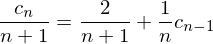

In [53]:
c = IndexedBase('c')
checks_recurrence = Eq(c[n]/(n+1), 2/(n+1) + c[n-1]/n)
checks_recurrence

In [54]:
c[n].args

In [55]:
checks_recurrence_spec=dict(recurrence_eq=checks_recurrence, indexed=c, index=n, terms_cache={})

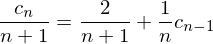

In [56]:
unfolded = do_unfolding_steps(checks_recurrence_spec, steps=0)
project_recurrence_spec(unfolded, recurrence_eq=True)

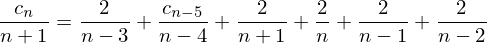

In [57]:
unfolded = do_unfolding_steps(checks_recurrence_spec,4)
recurrence_eq = project_recurrence_spec(unfolded, recurrence_eq=True)
recurrence_eq

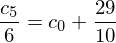

In [58]:
recurrence_eq.subs(n,5)

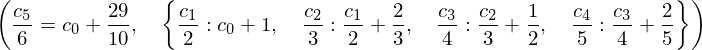

In [59]:
project_recurrence_spec(base_instantiation(unfolded), recurrence_eq=True, terms_cache=True)

In [63]:
ipython_latex(checks_recurrence_spec, times_range=range(10))

<IPython.core.display.Latex object>

### Quicksort's swaps recurrence

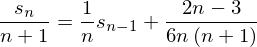

In [64]:
s = IndexedBase('s')
swaps_recurrence = Eq(s[n]/(n+1),s[n-1]/n + (2*n-3)/(6*n*(n+1)))
swaps_recurrence

In [65]:
swaps_recurrence_spec=dict(recurrence_eq=swaps_recurrence, indexed=s, index=n, terms_cache={})

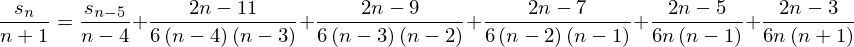

In [68]:
unfolded = do_unfolding_steps(swaps_recurrence_spec, 4)
recurrence_eq = project_recurrence_spec(unfolded, recurrence_eq=True)
recurrence_eq

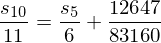

In [69]:
recurrence_eq.subs(n,10)

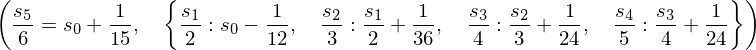

In [70]:
project_recurrence_spec(base_instantiation(unfolded), recurrence_eq=True, terms_cache=True)

In [72]:
ipython_latex(swaps_recurrence_spec, times_range=range(10))

<IPython.core.display.Latex object>

### Fibonacci recurrence

#### Backwards subscripts

In [73]:
f = IndexedBase('f')
fibonacci_recurrence = Eq(f[n],f[n-1]+f[n-2])
fibonacci_recurrence

In [74]:
fibonacci_recurrence_spec=dict(recurrence_eq=fibonacci_recurrence, indexed=f, index=n, terms_cache={})

In [75]:
unfolded = do_unfolding_steps(fibonacci_recurrence_spec, 5)
recurrence_eq = project_recurrence_spec(unfolded, recurrence_eq=True)
recurrence_eq

In [78]:
factored_recurrence_eq = project_recurrence_spec(factor_rhs_unfolded_rec(unfolded), recurrence_eq=True)
factored_recurrence_eq

In [79]:
factored_recurrence_eq.subs(n, 12)

In [80]:
project_recurrence_spec(base_instantiation(unfolded), recurrence_eq=True, terms_cache=True)

In [85]:
ipython_latex(fibonacci_recurrence_spec, times_range=range(8))

<IPython.core.display.Latex object>

#### Forward subscripts

In [86]:
f = IndexedBase('f')
fibonacci_recurrence = Eq(f[n+2],f[n+1]+f[n])
fibonacci_recurrence

In [87]:
fibonacci_recurrence_spec=dict(recurrence_eq=fibonacci_recurrence, indexed=f, index=n, terms_cache={})

In [88]:
unfolded = do_unfolding_steps(fibonacci_recurrence_spec, 5)
recurrence_eq = project_recurrence_spec(unfolded, recurrence_eq=True)
recurrence_eq

In [89]:
factored_recurrence_eq = project_recurrence_spec(factor_rhs_unfolded_rec(unfolded), recurrence_eq=True)
factored_recurrence_eq

In [90]:
factored_recurrence_eq.subs(n,10)

In [91]:
project_recurrence_spec(base_instantiation(unfolded), recurrence_eq=True, terms_cache=True)

In [92]:
ipython_latex(fibonacci_recurrence_spec, times_range=range(8))

<IPython.core.display.Latex object>